# Transformaciones geométricas

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## ¿Qué es una transformación afín?

En geometría, una transformación afín o aplicación afín (también llamada afinidad) entre dos espacios afines (en particular, dos espacios vectoriales) consiste en una transformación lineal seguida de una traslación. _[link wikipedia](https://es.wikipedia.org/wiki/Transformaci%C3%B3n_af%C3%ADn)_

1. Una transformación que se puede expresar en la forma de una multiplicación por una matriz (transformación lineal) seguida por una suma con un vector (traslación).
2. De lo anterior, podemos usar una transformación afín para expresar:

- Rotaciones (transformación lineal)
- Translaciones (suma con un vector)
- Operaciones de escalamientos (transformación lineal)

Se puede observar que, en esencia, una transformación afín representa una relación entre dos imágenes.

La forma usual de representar una transformación afín es usando una matriz 2x3.

$$A = \begin{bmatrix}
a_{00} & a_{01} \\
a_{10} & a_{11} 
\end{bmatrix}_{2x2}$$

$$B =\begin{bmatrix}
b_{00}  \\
b_{10}  
\end{bmatrix}_{2x1}$$

$$M=\begin{bmatrix}
a_{00} & a_{01} & b_{00}  \\
a_{10} & a_{11} & b_{10}
\end{bmatrix}_{2x3}$$

Considerando que queremos transformar un vector 2D $X = \begin{bmatrix} x \\ y \end{bmatrix}$ usando $A$ y $B$, podemos hacer lo mismo con:

$T= A\cdot\begin{bmatrix} x \\ y \end{bmatrix} + B$ ***ó*** $T=M\cdot[x, y, 1]^T$

$$T=\begin{bmatrix}
a_{00}x+a_{01}y+b_{00}  \\
a_{10}x+a_{11}y+b_{10}
\end{bmatrix}$$

$M$ es la matriz afín.

[link cv2](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html)

## Traslación

[[  1   0  60]
 [  0   1 100]
 [  0   0   1]]
(292, 452, 3)


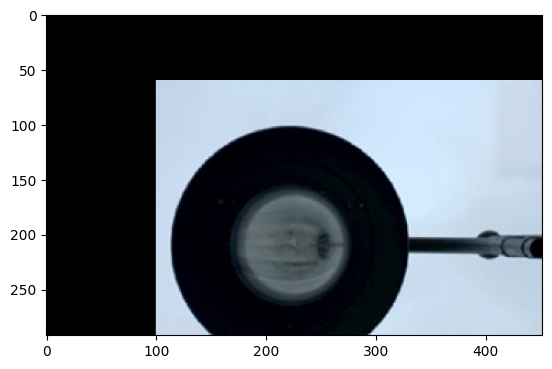

(292, 452, 3)


In [2]:
tx = 60
ty = 100

matriz_traslacion = np.array([[1, 0, tx],
                              [0, 1, ty],
                              [0, 0, 1]])
print(matriz_traslacion)

I = cv2.cvtColor(cv2.imread("imagenes/example_3.png"),cv2.COLOR_BGR2RGB)
I_size = np.shape(I)
print(I_size)
G = np.zeros(I_size, np.uint8)

for i in range(I_size[0]):
    for j in range(I_size[1]):
        w = np.matmul( matriz_traslacion, np.array([[i],[j],[1]]))
        wx = w[0]
        wy = w[1]
        if(wx >= 0 and wx < I_size[0]):
            if(wy >= 0 and wy < I_size[1]):
                G[wx, wy] = I[i, j]
            
plt.imshow(G)
plt.show()
print(G.shape)

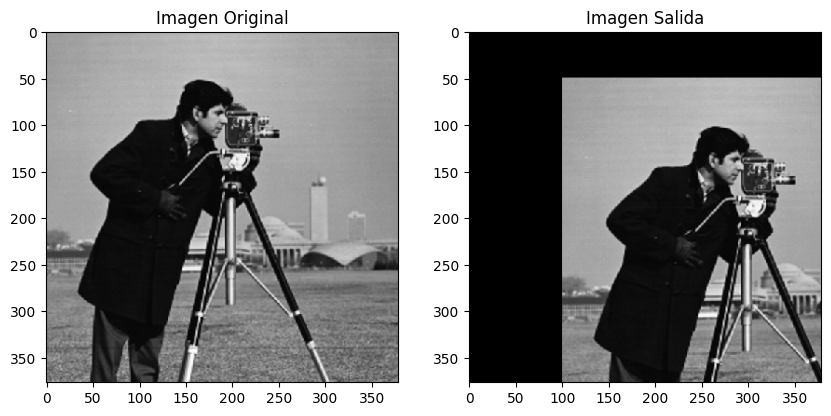

In [3]:
img = cv2.imread('imagenes/camara.png',cv2.IMREAD_GRAYSCALE)

filas, columnas = img.shape

tx = 100
ty = 50
matriz_afin = np.float32([[1,0,tx],
                          [0,1,ty]])

res = cv2.warpAffine(img, matriz_afin, (columnas,filas))#, flags=cv2.INTER_CUBIC)

fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res, cmap='gray')
plt.title("Imagen Salida")
plt.show()

## Reflexión

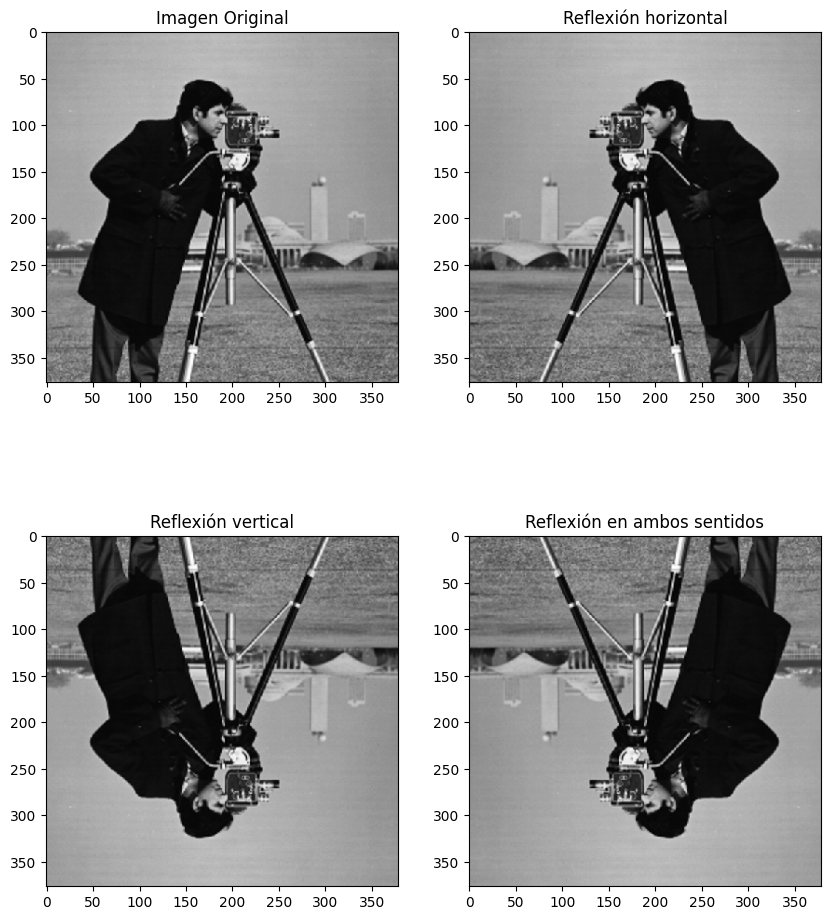

In [4]:
img = cv2.imread('imagenes/camara.png',cv2.IMREAD_GRAYSCALE)
filas, columnas = img.shape

matriz_afin_ref_horizontal = np.float32([[-1,0,columnas],
                                         [0,1,0]])
ref_x = cv2.warpAffine(img, matriz_afin_ref_horizontal, (columnas,filas))

matriz_afin_ref_vertical = np.float32([[1,0,0],
                                       [0,-1,filas]])
ref_y = cv2.warpAffine(img, matriz_afin_ref_vertical, (columnas,filas))

matriz_afin_ref_xy = np.float32([[-1,0,columnas],
                                 [0,-1,filas]])
ref_xy = cv2.warpAffine(img, matriz_afin_ref_xy, (columnas,filas))

fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Reflexión horizontal")

plt.subplot(2,2,3)
plt.imshow(ref_y,cmap='gray')
plt.title("Reflexión vertical")

plt.subplot(2,2,4)
plt.imshow(ref_xy,cmap='gray')
plt.title("Reflexión en ambos sentidos")

plt.show()

## Rotación

[[  0.70710678   0.70710678 -77.78636329]
 [ -0.70710678   0.70710678 189.20710678]]


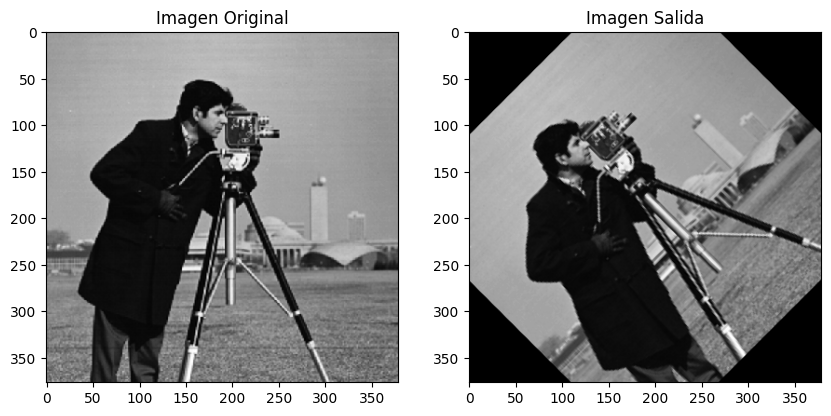

In [5]:
img = cv2.imread('imagenes/camara.png',cv2.IMREAD_GRAYSCALE)
filas, columnas = img.shape

theta = 45

rotation_center = ((columnas/2,filas/2))

matriz_afin_rotacion = cv2.getRotationMatrix2D(rotation_center, theta, 1)
print(matriz_afin_rotacion)

img_rotada = cv2.warpAffine(img, matriz_afin_rotacion, (columnas,filas))

fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(img_rotada,cmap='gray')
plt.title("Imagen Salida")

plt.show()

## Inclinación

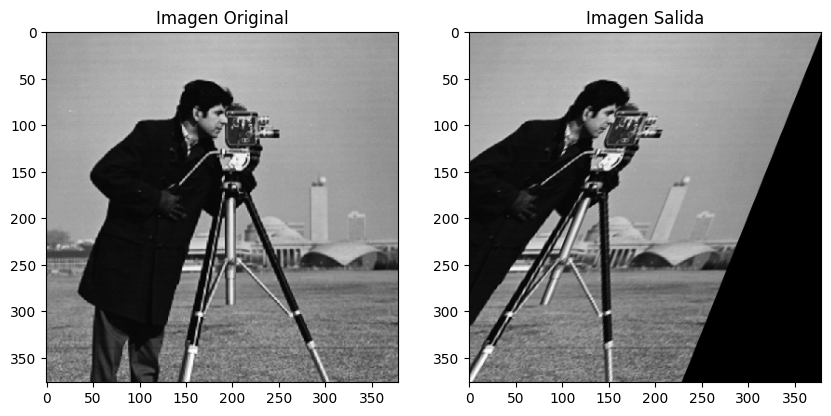

In [6]:
img = cv2.imread('imagenes/camara.png',cv2.IMREAD_GRAYSCALE)
filas, columnas = img.shape

inc_x = -0.4
inc_y = 0.0

matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

res = cv2.warpAffine(img,matriz_afin,(columnas,filas))


fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")

plt.show()

## Escalamientos

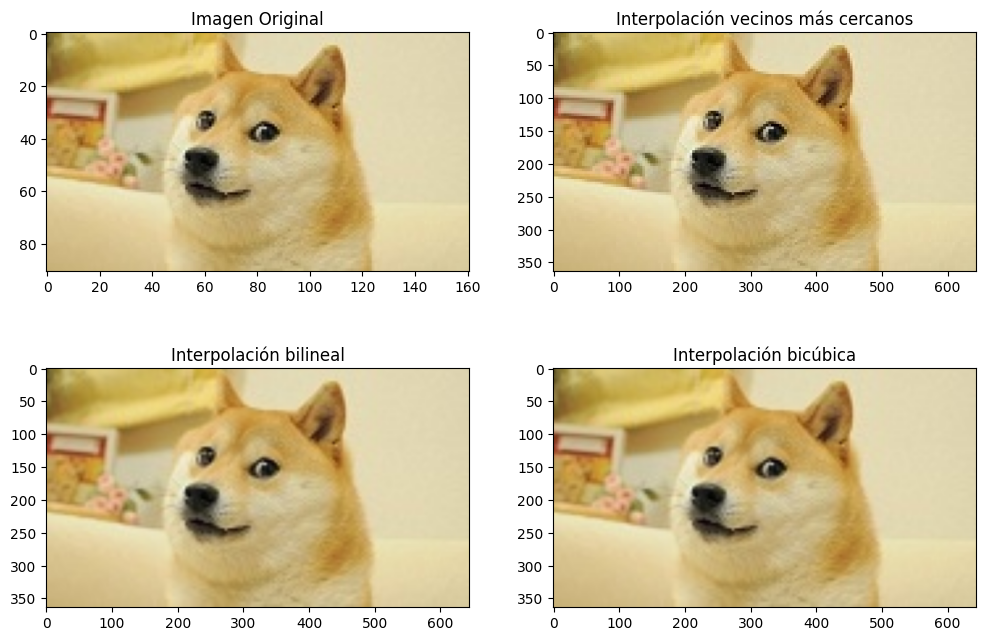

In [7]:
img = cv2.imread('imagenes/doge.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

nearest = cv2.resize(img,(img.shape[1]*4, img.shape[0]*4), interpolation = cv2.INTER_NEAREST)
bilinear = cv2.resize(img, None, fx=4, fy=4, interpolation = cv2.INTER_LINEAR)
bicubic = cv2.resize(img, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(nearest,cmap='gray')
plt.title("Interpolación vecinos más cercanos")

plt.subplot(2,2,3)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolación bilineal")

plt.subplot(2,2,4)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolación bicúbica")

plt.show()
